In [2]:
#Imports
import os
import math
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sm
from sklearn import datasets
from scipy import stats
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
import PyPDF2 as pyp
from wordcloud import WordCloud

In [3]:
# Assignment 1 (Print Hello!)
msg = "My name is Braxton Chick and my G number is G01105131"
print(msg)

My name is Braxton Chick and my G number is G01105131


(-0.65, 9.5)

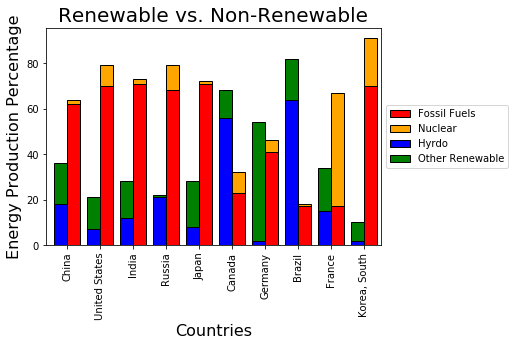

In [4]:
#Assignment2,3 (What does that even mean?)(I just can't see it)

#Data is of self governing territories/ Countries
#Reading in CSV Files
Comms = pd.read_csv("communications.csv")
Econ = pd.read_csv("economy.csv")
Elect = pd.read_csv("electricity.csv")
Enviro = pd.read_csv("environment_geography.csv")
Nat_Gas = pd.read_csv("naturalgas.csv")
Oil_Petro = pd.read_csv("oil_and_petroleum.csv")
Pop = pd.read_csv("people.csv")
Mil_Trans = pd.read_csv("transportation_military.csv")
#Removing 'Ranks' Columns Froms Dataframes
Update_Comms = Comms.drop(columns = ['broad_rank','int_use_rank','tel_fix_rank','tel_mob_rank'])
Update_Econ = Econ.drop(columns = ['gdp_growth_rank','infl_rank','real_gdp_rank','gdp_per_cap_rank','nat_sav_rank','indust_prod_rank','labor_rank','unemp_rank','gini_rank','tax_coll_rank','budge_rank','debt_rank', 'acc_bal_rank','exports_rank','imports_rank','gold_forex_rank','debt_ext_rank'])
Update_Elect = Elect.drop(columns = ['elec_consum_rank','elec_prod_rank','elec_export_rank','elec_import_rank','elec_install_gen_capac_rank','perc_from_foss_rank','perc_from_nuc_rank','perc_from_hyd_rank','perc_from_other_rank'])
Update_Enviro = Enviro.drop(columns = ['area_rank','rev_for_rank','rev_coal_rank'])
Update_Nat_Gas = Nat_Gas.drop(columns = ['nat_gas_res_rank','nat_gas_imp_rank','nat_gas_exp_rank','nat_gas_con_rank','nat_gas_prod_rank'])
Update_Oil_Petro = Oil_Petro.drop(columns = ['oil_prod_rank','oil_exp_rank','oil_imp_rank','oil_res_rank','petr_prod_rank','petr_cons_rank','petr_exp_rank','petr_imp_rank'])
Update_Pop = Pop.drop(columns = ['pop_growth_rank','pop_rank','med_age_rank','birth_rank','death_rank','migr_rank','matern_rank','inf_rank','life_exp_rank','fert_rank','hiv_prev_rank','people_hiv_rank','hiv_deaths_rank','obes_rank','underwe_rank','ed_exp_rank','unemp_youth_rank'])
Update_Mil_Trans = Mil_Trans.drop(columns = ['mil_exp_rank','merch_mar_rank','waterway_rank','roadway_rank','railway_rank','airports_rank'])
#Joining Dataframes
Comm_Econ = Update_Comms.join(Update_Econ.set_index('name'), on='name') #Communication & Econ
Elect_Enviro = Update_Elect.join(Update_Enviro.set_index('name'), on='name') #Electricity & Environment
Gas_Oil = Update_Nat_Gas.join(Update_Oil_Petro.set_index('name'), on='name') #Natural Gas & Oil/Petroleum
Pop_Mil = Update_Pop.join(Update_Mil_Trans.set_index('name'), on='name') #Population & Military Transportation

Half1 = Comm_Econ.join(Elect_Enviro.set_index('name'), on='name') # (Communication & Econ) & (Electricity & Environment)
Half2 = Gas_Oil.join(Pop_Mil.set_index('name'), on='name') # (Natural Gas & Oil/Petroleum) & (Population & Military Transportation)

Full_Data = Half1.join(Half2.set_index('name'), on='name') # ALL

#Electric Visualizations
#Getting Columns
Elec_Data = Full_Data[['name','elec_prod_kWh','perc_from_foss_fuel','perc_from_nuc_fuel','perc_from_hyd_plant','perc_from_other']]
#Removing Null Values
Elec_Data = Elec_Data[Elec_Data.elec_prod_kWh.notnull()]
#Removing Commas & Spaces From Production Data
Elec_Data['elec_prod_kWh']=Elec_Data['elec_prod_kWh'].str.replace(',','')
Elec_Data['elec_prod_kWh']=Elec_Data['elec_prod_kWh'].str.replace(' ','')
#Changing Data To Integer
Elec_Data['elec_prod_kWh']=pd.to_numeric(Elec_Data['elec_prod_kWh'])

#TOP 10 LARGEST ENERGY PRODUCERS
EN_Large = Elec_Data.nlargest(10, 'elec_prod_kWh')
EN_Large = EN_Large.drop(columns = ['elec_prod_kWh'])
#Seperating two renewable and non renewable
#Nuclear and Fossil
Non_Re = EN_Large[['name','perc_from_foss_fuel','perc_from_nuc_fuel']]
#Renewables
Re = EN_Large[['name','perc_from_hyd_plant','perc_from_other']]

#BARGRAPH SECTION
fig, ax = plt.subplots()
#Non-Renewable Graph
Non_Re.plot(kind="bar", stacked=True, width=0.4, 
                  ax=ax, position=0,x = 'name',color=['red','orange'],edgecolor = 'black')
#Renewable Graph
Re.plot(kind="bar", stacked=True, width=0.4, 
                   ax=ax, position=1,x = 'name',color=['blue','green'],edgecolor = 'black')
#Legends & Labels
plt.xlabel('Countries', fontsize=16)
plt.ylabel('Energy Production Percentage', fontsize=16)
plt.title('Renewable vs. Non-Renewable',fontsize=20)
plt.legend(['Fossil Fuels', 'Nuclear','Hyrdo','Other Renewable'],loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlim(right=len(Non_Re)-0.5)

In [6]:
# Assignment 4 (Tell me your Secrets)
df = pd.read_excel("forestfires.xlsx")
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


Which month has the highest frequiency of forest fires?


Text(0.5, 1.0, 'Frequency of Fires in Months')

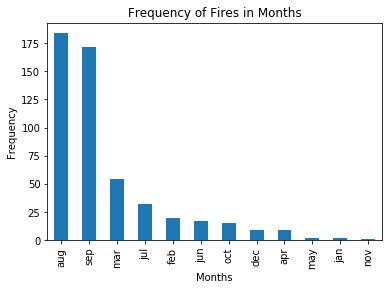

In [7]:
# QUESTION
print("Which month has the highest frequiency of forest fires?")

#Visualization
fig, ax = plt.subplots()
df['month'].value_counts().plot(ax=ax, kind='bar')

#Legend & Titles
ax.set_xlabel("Months")
ax.set_ylabel("Frequency")
plt.title('Frequency of Fires in Months')


How does Wind, Temperature, and Humidity impact Area of the fire?


Text(0.5, 1.0, 'Humidity Vs. Area')

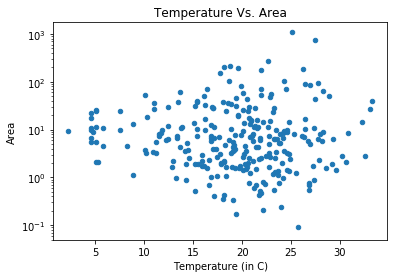

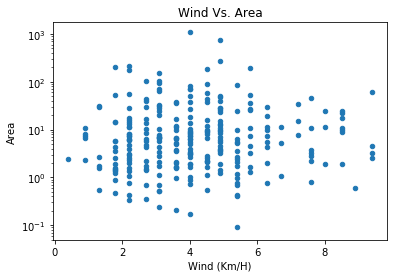

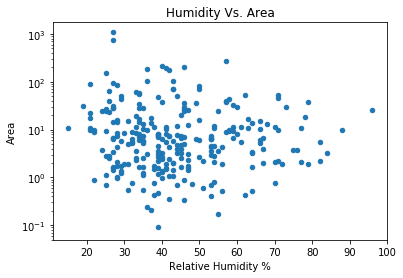

In [8]:
# Question
print("How does Wind, Temperature, and Humidity impact Area of the fire?")

#Removing Outliers
#NoOut = df[(np.abs(stats.zscore(df['area'])) < 3)]
NoOut = df[df['area'] != 0.0]

# Temp vs Area
ax = NoOut.plot(kind="scatter", x = 'temp', y ='area')
#Labels & Scale
ax.set_yscale('log')
ax.set_xlabel("Temperature (in C)")
ax.set_ylabel("Area")
plt.title('Temperature Vs. Area')

# Wind vs Area
ay = NoOut.plot(kind="scatter", x = 'wind', y ='area')
#Labels & Scale
ay.set_yscale('log')
ay.set_xlabel("Wind (Km/H)")
ay.set_ylabel("Area")
plt.title('Wind Vs. Area')

# Humidity vs Area
az = NoOut.plot(kind="scatter", x = 'RH', y ='area')
#Labels & Scale
az.set_yscale('log')
az.set_xlabel("Relative Humidity %")
az.set_ylabel("Area")
plt.title('Humidity Vs. Area')


What sector has the most area on fire on average?


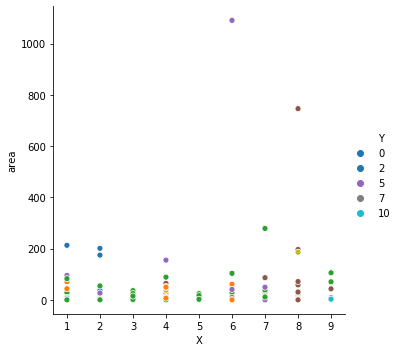

In [9]:
# Question
print("What sector has the most area on fire on average?")

sns.relplot(x="X", y="area", hue ="Y",palette = "tab10", data=df)

#I wanted to do more with this one. I was trying to seperate into individual sectors and 
# get the average for that sector and plot it. Unfortunately i did not get that far.
#If you have any tips or advice i would appreciate it.


In [10]:
#Assignment 5 (Data Mungling is Fun)
#Assignment Task 1
#Part A
#How many rows and columns does your data have?
df.shape

# Rows    = 517
# Columns = 13

(517, 13)

In [10]:
#Part B
#What are the different data types in the dataset (e.g., string, Boolean, integer, floating, date/time, categorical, etc.)?
df.dtypes

# There are 3 Integer columns, 2 Object (string) columns, and 8 Float columns.

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [11]:
#Part C
#What variables would you rename to make your visualization look better?
print("I prefer leaving variables in their condensed forms and adding labels to my visualizations,but if i were to alter variables, I would change ")
print("    'RH' to Relative Humidity")
print("    'temp' to Temperature")

In [12]:
#Part D
#Describe any missing values. Using the rule of thumb in Data Visualization Made Simple, 
#    would you remove those rows or columns?

df.isnull().sum()

# Luckily there are no missing values, but if there were i would replace said value with something that would
#not skew the data.

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [13]:
#Part E
#What other cleaning / prep steps would you do, based on the advice in Data Visualization Made Simple

print("If i was prepping this data, I should do some descriptive statistics and do some exploratory visualizations. forming some questions and thinking of what visualization i could produce.")

If i was prepping this data, I should do some descriptive statistics and do some exploratory visualizations. forming some questions and thinking of what visualization i could produce.


In [14]:
#Assignment Task 2
#Using the code examples in the Data Visualization Workshop files, perform at least one cleaning step on your data. 
#Use a Markdown cell to describe what you cleaned and how. Use a code cell to write the code that performs the cleaning.

#I want to look at all the data in August, in order to do this i would have to filter all other data outside my dataframe.
##I built a new datafram with only august data, and this would be a cleaner dataframe to build visualizations from.

August = df["month"] =='aug'
ForestAugust = df[August]
ForestAugust

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00
12,6,5,aug,fri,63.5,70.8,665.3,0.8,17.0,72,6.7,0.0,0.00
23,7,4,aug,sat,90.2,110.9,537.4,6.2,19.5,43,5.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,8,6,aug,sun,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,0.00
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16


In [11]:
#Assignment 6 (Visualizing correlation, comparisons, and trends.)
#Task 1:
print("As 'Area' increase's, does 'temp' increase or decrease?")

As 'Area' increase's, does 'temp' increase or decrease?


In [12]:
corrs = df.corr()
round(corrs,2)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.00,0.54,-0.02,-0.05,-0.09,0.01,-0.05,0.09,0.02,0.07,0.06
Y,0.54,1.00,-0.05,0.01,-0.10,-0.02,-0.02,0.06,-0.02,0.03,0.04
FFMC,-0.02,-0.05,1.00,0.38,0.33,0.53,0.43,-0.30,-0.03,0.06,0.04
DMC,-0.05,0.01,0.38,1.00,0.68,0.31,0.47,0.07,-0.11,0.07,0.07
DC,-0.09,-0.10,0.33,0.68,1.00,0.23,0.50,-0.04,-0.20,0.04,0.05
ISI,0.01,-0.02,0.53,0.31,0.23,1.00,0.39,-0.13,0.11,0.07,0.01
temp,-0.05,-0.02,0.43,0.47,0.50,0.39,1.00,-0.53,-0.23,0.07,0.10
RH,0.09,0.06,-0.30,0.07,-0.04,-0.13,-0.53,1.00,0.07,0.10,-0.08
wind,0.02,-0.02,-0.03,-0.11,-0.20,0.11,-0.23,0.07,1.00,0.06,0.01
rain,0.07,0.03,0.06,0.07,0.04,0.07,0.07,0.10,0.06,1.00,-0.01


[Text(0.5, 1, 'Heatmap of Correlation Matrix')]

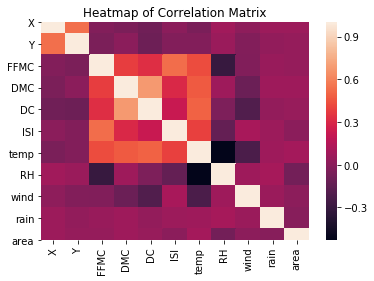

In [13]:
sns.heatmap(corrs).set(title = "Heatmap of Correlation Matrix")

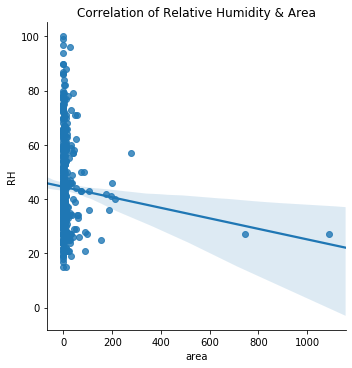

In [14]:
ax.set(xscale="log", yscale="log")
sns.lmplot(x="area", y="RH", data=df).set(title = "Correlation of Relative Humidity & Area")


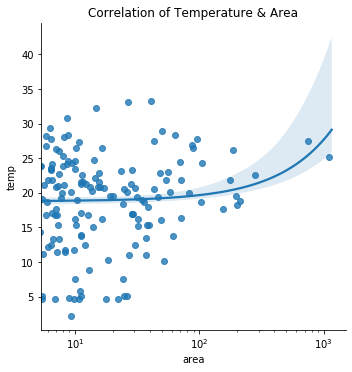

In [15]:
grid = sns.lmplot('area', 'temp', df).set(title = "Correlation of Temperature & Area")
grid.set(xscale="log")

In [16]:
#Assignment 7 (Visualizing distributions and part-to-whole)
#Task 1
#Develop one question related to distributions or part-to-whole for this dataset. Write the question in a Markdown cell in your notebook.
print("How many fires occur throughout the year by months and which month has the most fires?")

How many fires occur throughout the year by months and which month has the most fires?


C:\Users\Braxton\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Frequency of Fires in Months')

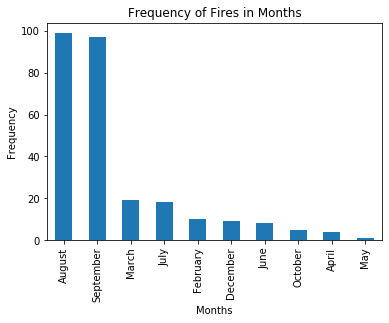

In [17]:
clean_df = df[df['area'] != 0.0]
clean_df['month'] = clean_df['month'].replace({'jul':'July','sep':'September','aug':'August','mar':'March','jun':'June','apr':'April','oct':'October','feb':'February','dec':'December','may':'May'})
clean_df
#Visualization
fig, ax = plt.subplots()
clean_df['month'].value_counts().plot(ax=ax, kind='bar')

#Legend & Titles
ax.set_xlabel("Months")
ax.set_ylabel("Frequency")
plt.title('Frequency of Fires in Months')

In [18]:
#Assignment 8 (Visualizing geospatial data)

#Data
Airports = pd.read_csv('airports.csv')
Airports['STATE'].astype(str)
Airports

,IATA,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABQ,Albuquerque International,Albuquerque,NM,USA,35.040222,-106.609194
1,ANC,Ted Stevens Anchorage International,Anchorage,AK,USA,61.174320,-149.996186
2,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944
3,AUS,Austin-Bergstrom International,Austin,TX,USA,30.194533,-97.669872
4,BDL,Bradley International,Windsor Locks,CT,USA,41.938874,-72.683228
...,...,...,...,...,...,...,...
336,WRG,Wrangell,Wrangell,AK,USA,56.484326,-132.369824
337,WYS,Yellowstone,West Yellowstone,MT,USA,44.688399,-111.117638
338,XNA,Northwest Arkansas Regional,Fayetteville Springdale Rogers,AR,USA,36.281869,-94.306811
339,YAK,Yakutat,Yakutat,AK,USA,59.503361,-139.660226


In [19]:
#Task 1
#Question related to geospatial aspects of this dataset.
print('Question: How many states have 10 or more airports & which state has the most Airports?')


Question: How many states have 10 or more airports & which state has the most Airports?


In [21]:
#Task 2
#Graphic
Airports_count = Airports['STATE'].value_counts()
Airports_Grouped = Airports.groupby(['STATE']).mean()
Airports_Grouped['COUNT'] = Airports_count
#Airports_Grouped['STATE'] =
Airports_Grouped

#Graphic
m_2 = folium.Map(location = [41, -95.7129], zoom_start = 3)

# Add points to the map
for i in range(0,len(Airports_Grouped)):
    if Airports_Grouped.iloc[i]["COUNT"] >= 10:        
        folium.Marker(
            location = [Airports_Grouped.iloc[i]['LATITUDE'], Airports_Grouped.iloc[i]['LONGITUDE']],
            popup=Airports_Grouped.iloc[i]["COUNT"]
        ).add_to(m_2)
m_2

In [22]:
#Task 3
#Interpretation of the graph (100 to 500 words), including how it answers the question.
print('Interpretation: This map shows states and territories with 10 or more airports. With the filter in place it significantly reduces the number of markers , allowing for a more legible map. We can that there are 7 states with 10  or more airports and by clicking the marker it will show the number of airports within the given state. So, by going through the markers we can see California has 26, Texas at 25, and Alaska at 19. I think that this visualization fully answers my original question of “How many states have more that 10 airports? And which state has the most airports?”.  Although it fully answers my question, I think this visualization could be greatly improved. I think if I had time, I would include state names within the markers, apply a heatmap layer to show the distribution of airports throughout the states, and if possible maybe include statistics such as “Airports per capita”. I think this is a sufficient enough graph to convey the point and is a good foundation, but with more time and knowledge I think this could be more fleshed out.')

Interpretation: This map shows states and territories with 10 or more airports. With the filter in place it significantly reduces the number of markers , allowing for a more legible map. We can that there are 7 states with 10  or more airports and by clicking the marker it will show the number of airports within the given state. So, by going through the markers we can see California has 26, Texas at 25, and Alaska at 19. I think that this visualization fully answers my original question of “How many states have more that 10 airports? And which state has the most airports?”.  Although it fully answers my question, I think this visualization could be greatly improved. I think if I had time, I would include state names within the markers, apply a heatmap layer to show the distribution of airports throughout the states, and if possible maybe include statistics such as “Airports per capita”. I think this is a sufficient enough graph to convey the point and is a good foundation, but with mor

In [23]:
#Assignment 9 (Visualizing concepts and qualitative data)

#Data
RandJ_txt = open('RandJ.txt', 'r')
RandJ_data = RandJ_txt.read().strip()
RandJ_txt.close()

names = ['Rom.','Samp.','Greg.','Ben.','Mon.','M.','Prince.','Cap.','Wife.','Citizens.','Officer.','Tyb.','Abr.','Serv.','Nurse.','Jul.','Wife.','Chor.','Mer','.','O']

for name in names:
    RandJ_data = RandJ_data.replace(name,'')

#print(RandJ_data)

In [24]:
#Task 1
print("What word is said the most in Romeo and Juilet?")

What word is said the most in Romeo and Juilet?


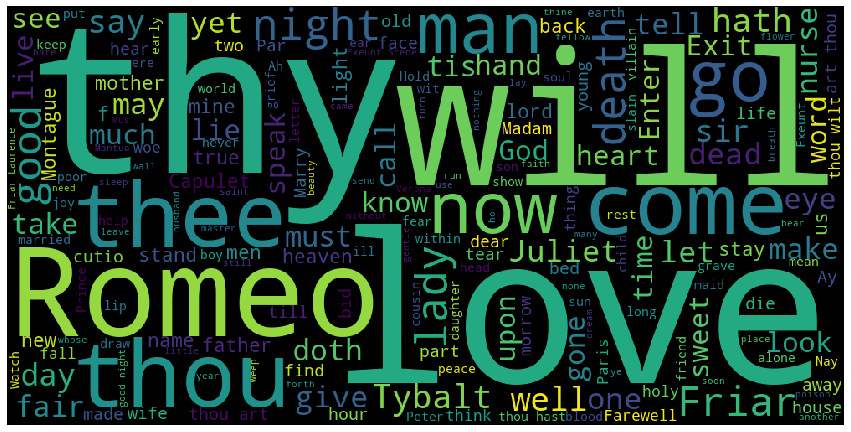

In [25]:
#Task 2

wordcloud = WordCloud(width = 1000, height = 500).generate(RandJ_data)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
#plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [26]:
#Task 3
print("The interpretation I have from my word cloud is “Thy will love”, which kind of sums up Romeo and Juliet. I think that is a fun and cool way to display the most frequent words within this play. Although a wordcloud is not super descriptive,  but I think this is a good way to attract and audience and make a visualization easily understandable. I believe this answers the question in a fun and creative way.")

The interpretation I have from my word cloud is “Thy will love”, which kind of sums up Romeo and Juliet. I think that is a fun and cool way to display the most frequent words within this play. Although a wordcloud is not super descriptive,  but I think this is a good way to attract and audience and make a visualization easily understandable. I believe this answers the question in a fun and creative way.
